<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Data Manipulation, EDA, and Reporting Results

_Authors: Joseph Nelson (DC), Sam Stack (DC)_

---

> **This lab is intentionally open-ended, and you're encouraged to answer your own questions about the dataset!**


### What makes a song a hit?

On next week's episode of the 'Are You Entertained?' podcast, we're going to be analyzing the latest generation's guilty pleasure- the music of the '00s. 

Our Data Scientists have poured through Billboard chart data to analyze what made a hit soar to the top of the charts, and how long they stayed there. Tune in next week for an awesome exploration of music and data as we continue to address an omnipresent question in the industry- why do we like what we like?

**Provide (at least) a markdown cell explaining your key learnings about top hits: what are they, what common themes are there, is there a trend among artists (type of music)?**

---

### Minimum Requirements

**At a minimum, you must:**

- Use Pandas to read in your data
- Rename column names where appropriate
- Describe your data: check the value counts and descriptive statistics
- Make use of groupby statements
- Utilize Boolean sorting
- Assess the validity of your data (missing data, distributions?)

**You should strive to:**

- Produce a blog-post ready description of your lab
- State your assumptions about the data
- Describe limitations
- Consider how you can action this from a stakeholder perspective (radio, record label, fan)
- Include visualizations

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from datetime import datetime

plt.style.use('fivethirtyeight')

%matplotlib inline
%config lineBackend.figure_format = 'retina'

# Billboard data CSV:
billboard_csv = './datasets/billboard.csv'

# We need to use encoding='latin-1' to deal with non-ASCII characters.
df = pd.read_csv(billboard_csv, encoding='latin-1')

In [3]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = pd.read_csv(billboard_csv, encoding='latin-1').rename(columns={'artist.inverted':'artist'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 83 columns):
year            317 non-null int64
artist          317 non-null object
track           317 non-null object
time            317 non-null object
genre           317 non-null object
date.entered    317 non-null object
date.peaked     317 non-null object
x1st.week       317 non-null int64
x2nd.week       312 non-null float64
x3rd.week       307 non-null float64
x4th.week       300 non-null float64
x5th.week       292 non-null float64
x6th.week       280 non-null float64
x7th.week       269 non-null float64
x8th.week       260 non-null float64
x9th.week       253 non-null float64
x10th.week      244 non-null float64
x11th.week      236 non-null float64
x12th.week      222 non-null float64
x13th.week      210 non-null float64
x14th.week      204 non-null float64
x15th.week      197 non-null float64
x16th.week      182 non-null float64
x17th.week      177 non-null float64
x18th.week      1

In [8]:
### The dataset is not in its ideal format. 
### Usually when data is similar (i.e. rank by week), we would like to make the week as a column and as a row

In [9]:
week_list = []
for i in range(1,77):
    if str(i)[-2:] == '11':
        week_list.append('x' + str(i) + 'th.week')
    elif str(i)[-2:] == '12':
        week_list.append('x' + str(i) + 'th.week')
    elif str(i)[-2:] == '13':
        week_list.append('x' + str(i) + 'th.week')
    elif str(i)[-1:] == '1':
        week_list.append('x' + str(i) + 'st.week')
    elif str(i)[-1:] == '2':
        week_list.append('x' + str(i) + 'nd.week')
    elif str(i)[-1:] == '3':
        week_list.append('x' + str(i) + 'rd.week')
    else:
        week_list.append('x' + str(i) + 'th.week')
        
week_list

['x1st.week',
 'x2nd.week',
 'x3rd.week',
 'x4th.week',
 'x5th.week',
 'x6th.week',
 'x7th.week',
 'x8th.week',
 'x9th.week',
 'x10th.week',
 'x11th.week',
 'x12th.week',
 'x13th.week',
 'x14th.week',
 'x15th.week',
 'x16th.week',
 'x17th.week',
 'x18th.week',
 'x19th.week',
 'x20th.week',
 'x21st.week',
 'x22nd.week',
 'x23rd.week',
 'x24th.week',
 'x25th.week',
 'x26th.week',
 'x27th.week',
 'x28th.week',
 'x29th.week',
 'x30th.week',
 'x31st.week',
 'x32nd.week',
 'x33rd.week',
 'x34th.week',
 'x35th.week',
 'x36th.week',
 'x37th.week',
 'x38th.week',
 'x39th.week',
 'x40th.week',
 'x41st.week',
 'x42nd.week',
 'x43rd.week',
 'x44th.week',
 'x45th.week',
 'x46th.week',
 'x47th.week',
 'x48th.week',
 'x49th.week',
 'x50th.week',
 'x51st.week',
 'x52nd.week',
 'x53rd.week',
 'x54th.week',
 'x55th.week',
 'x56th.week',
 'x57th.week',
 'x58th.week',
 'x59th.week',
 'x60th.week',
 'x61st.week',
 'x62nd.week',
 'x63rd.week',
 'x64th.week',
 'x65th.week',
 'x66th.week',
 'x67th.week',
 'x6

In [10]:
### Create a DataFrame that has the following columns: year, artist, track, genre, date_entered, week, rank
### Note, this will make analysis cleaner. You will see. :)

df2 = pd.melt(frame=df, id_vars=['artist','year','track','time','genre','date.entered','date.peaked'], value_vars=week_list, var_name='week', value_name='rank')

In [11]:
df2.sort_values(['track','week']).head(40)

,artist,year,track,time,genre,date.entered,date.peaked,week,rank
2900,Nelly,2000,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,x10th.week,36.0
3217,Nelly,2000,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,x11th.week,37.0
3534,Nelly,2000,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,x12th.week,30.0
3851,Nelly,2000,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,x13th.week,23.0
4168,Nelly,2000,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,x14th.week,21.0
4485,Nelly,2000,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,x15th.week,17.0
4802,Nelly,2000,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,x16th.week,17.0
5119,Nelly,2000,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,x17th.week,15.0
5436,Nelly,2000,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,x18th.week,11.0
5753,Nelly,2000,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,x19th.week,11.0


In [12]:
### Further clean the data: The time column is not usable, convert to a usable time format.
df2['time'] = pd.to_datetime(df2.time)

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24092 entries, 0 to 24091
Data columns (total 9 columns):
artist          24092 non-null object
year            24092 non-null int64
track           24092 non-null object
time            24092 non-null datetime64[ns]
genre           24092 non-null object
date.entered    24092 non-null object
date.peaked     24092 non-null object
week            24092 non-null object
rank            5307 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 1.7+ MB


In [14]:
df2.time.sort_values()

4287    2019-12-10 02:36:00
10944   2019-12-10 02:36:00
11261   2019-12-10 02:36:00
1751    2019-12-10 02:36:00
11578   2019-12-10 02:36:00
6189    2019-12-10 02:36:00
11895   2019-12-10 02:36:00
21722   2019-12-10 02:36:00
12212   2019-12-10 02:36:00
12529   2019-12-10 02:36:00
22039   2019-12-10 02:36:00
12846   2019-12-10 02:36:00
13163   2019-12-10 02:36:00
5872    2019-12-10 02:36:00
3653    2019-12-10 02:36:00
23624   2019-12-10 02:36:00
1434    2019-12-10 02:36:00
13797   2019-12-10 02:36:00
21088   2019-12-10 02:36:00
14114   2019-12-10 02:36:00
5555    2019-12-10 02:36:00
21405   2019-12-10 02:36:00
14431   2019-12-10 02:36:00
10627   2019-12-10 02:36:00
10310   2019-12-10 02:36:00
7457    2019-12-10 02:36:00
22990   2019-12-10 02:36:00
7774    2019-12-10 02:36:00
7140    2019-12-10 02:36:00
166     2019-12-10 02:36:00
                ...        
2902    2019-12-10 07:50:00
366     2019-12-10 07:50:00
9559    2019-12-10 07:50:00
16216   2019-12-10 07:50:00
4804    2019-12-10 0

In [15]:
df3 = df2.groupby('track')['time'].min()
df3

track
(Hot S**t) Country Grammar            2019-12-10 04:17:00
3 Little Words                        2019-12-10 03:54:00
911                                   2019-12-10 04:00:00
A Country Boy Can Survive             2019-12-10 03:54:00
A Little Gasoline                     2019-12-10 03:07:00
A Puro Dolor (Purest Of Pain)         2019-12-10 03:30:00
Aaron's Party (Come Get It)           2019-12-10 03:23:00
Absolutely (Story Of A Girl)          2019-12-10 03:09:00
All Good?                             2019-12-10 05:02:00
All The Small Things                  2019-12-10 02:52:00
Amazed                                2019-12-10 04:25:00
American Pie                          2019-12-10 04:30:00
Angels                                2019-12-10 03:56:00
Another Dumb Blonde                   2019-12-10 03:47:00
Another Nine Minutes                  2019-12-10 03:10:00
Anything                              2019-12-10 03:41:00
As We Lay                             2019-12-10 06:20:00
Auld Lan

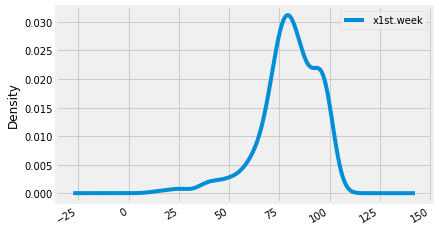

In [16]:
### Plot the histogram and density functions for time. Do they represent a normal curve?
df.plot(kind='kde',x='time',y='x1st.week')
plt.gcf().autofmt_xdate()

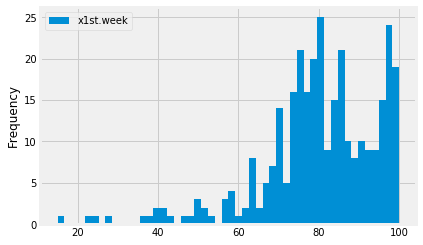

In [17]:
df.plot(kind='hist',x='time',y='x1st.week',bins=50);

In [18]:
df.genre.value_counts()

Rock           137
Country         74
Rap             58
R&B             23
Pop              9
Latin            9
Electronica      4
Reggae           1
Gospel           1
Jazz             1
Name: genre, dtype: int64

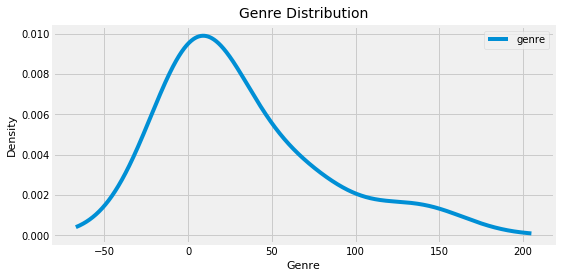

In [19]:
### Plot the histogram and density functions for time across different genres. Do they represent a normal curve?
fig, ax = plt.subplots(1,1, figsize=(8,4));
ax = df.genre.value_counts().plot(kind='kde',y='x1st.week')
ax.set_title('Genre Distribution', fontsize=14, y=1.01);
ax.legend(loc=1);
ax.set_ylabel('Density', fontsize=11);
ax.set_xlabel('Genre', fontsize=11);


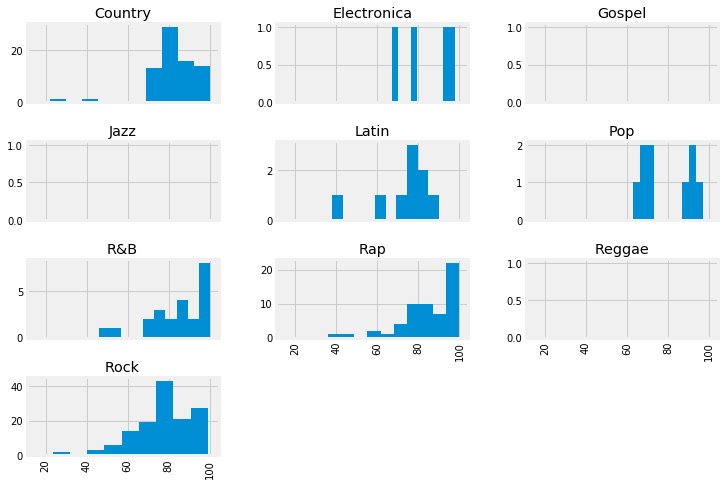

In [27]:
ax2 = df.hist('x1st.week',by='genre',figsize=(12,8), sharex=True);

In [ ]:
### Do some analysis on rankings. This is open ended. The general question is, what impacts rankings?
### Also analyze, is there a relationship between ranking, entry and genre?
### Does duration of the song in the Billboard also get impacted?
### Does genre impact the % of songs making it to #1? #5? You will need to transform variables.